In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import seaborn as sns

In [92]:
users_df = pd.read_csv("./Data/users_cleaned.csv", index_col=0)
users_df = users_df.reset_index(drop=True)
users_df.head(5)

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,2255153,3,49,1,0,0,55.091667,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391
1,37326,45,195,27,25,59,82.574306,Male,"Detroit,Michigan",1991-08-01 00:00:00,NaN,2008-02-13 00:00:00,2017-07-10 06:52:54,6.15,6.0,4903
2,228342,25,414,2,5,11,159.483333,Male,"Nayarit, Mexico",1990-12-14 00:00:00,NaN,2009-08-31 00:00:00,2014-05-12 16:35:00,8.27,1.0,9701
3,327311,5,5,0,0,0,11.394444,Female,"Malaysia, Kuantan",1998-08-24 00:00:00,NaN,2010-05-10 00:00:00,2012-10-18 19:06:00,9.70,6.0,697
4,5015094,35,114,6,20,175,30.458333,Male,"Nijmegen, Nederland",1999-10-24 00:00:00,NaN,2015-11-26 00:00:00,2018-05-10 20:53:37,7.86,0.0,1847


In [93]:
statistics = users_df[["user_watching", "user_completed","user_onhold", "user_dropped", "user_plantowatch", "user_days_spent_watching"]]

In [94]:
statistics = statistics.to_numpy().astype("float")
statistics

array([[  3.        ,  49.        ,   1.        ,   0.        ,
          0.        ,  55.09166667],
       [ 45.        , 195.        ,  27.        ,  25.        ,
         59.        ,  82.57430556],
       [ 25.        , 414.        ,   2.        ,   5.        ,
         11.        , 159.48333333],
       ...,
       [  6.        , 103.        ,  10.        ,   8.        ,
         54.        ,  46.82708333],
       [ 22.        , 239.        ,   0.        ,   4.        ,
        176.        ,  72.36111111],
       [ 11.        ,  73.        ,   2.        ,   2.        ,
         16.        ,  64.43125   ]])

In [95]:
# # #Normalize the data, since we're using KMeans

statistics = normalize(statistics, axis=1, norm='l2')

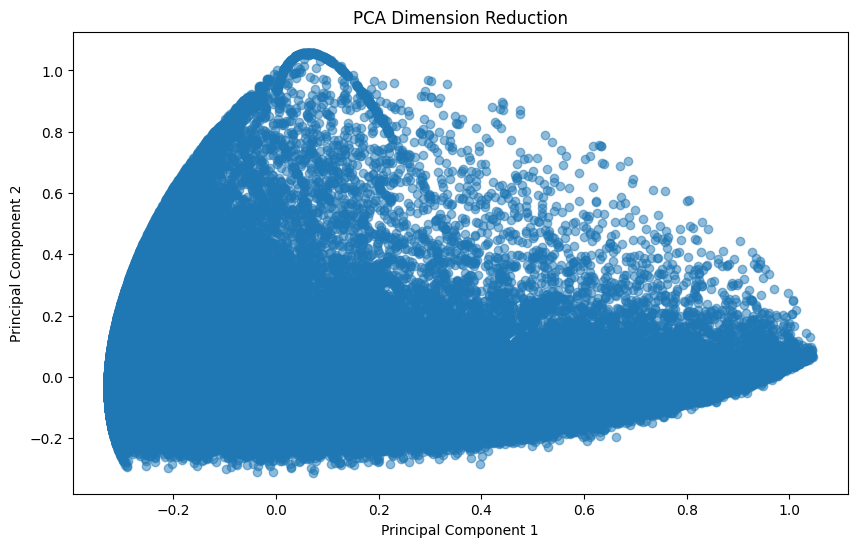

In [96]:
pca = PCA(n_components=2)

result_pca = pca.fit_transform(statistics)

plt.figure(figsize=(10, 6))
plt.scatter(result_pca[:, 0], result_pca[:, 1], alpha=0.5)
plt.title('PCA Dimension Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

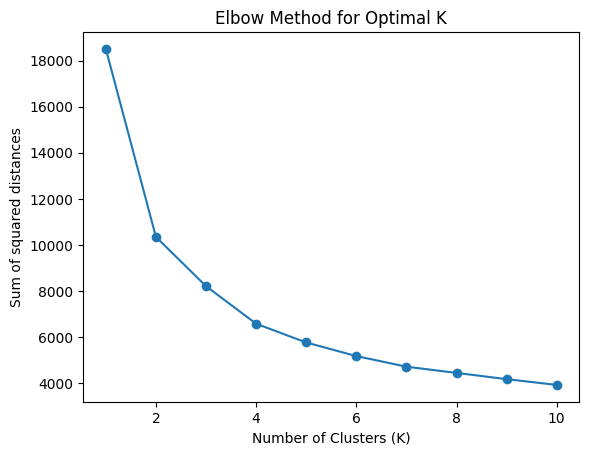

In [97]:
from sklearn.cluster import KMeans


sum_squared_distances = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2023)
    kmeans.fit(statistics)
    sum_squared_distances.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K_range, sum_squared_distances, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()


In [98]:
#Choose 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=2023)
kmeans.fit(statistics)

/home/vietanh/anaconda3/envs/M2_DM/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=2023)

In [99]:
cluster_ids = kmeans.labels_
cluster_ids = list(cluster_ids)

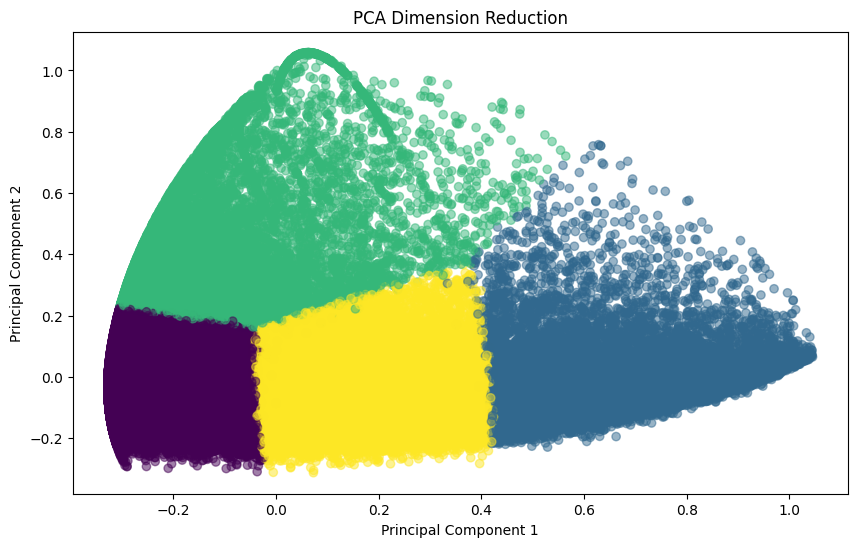

In [100]:
pca = PCA(n_components=2)

result_pca = pca.fit_transform(statistics)

plt.figure(figsize=(10, 6))
plt.scatter(result_pca[:, 0], result_pca[:, 1], c=cluster_ids, cmap='viridis', alpha=0.5)
plt.title('PCA Dimension Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [101]:
#Find properties for each clusters
users_df["cluster_id"] = list(cluster_ids)
users_df = users_df.drop(columns=["user_watching", "user_completed","user_onhold", "user_dropped", "user_plantowatch", "user_days_spent_watching"])

In [102]:
users_df.head(1)

,user_id,gender,location,birth_date,access_rank,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes,cluster_id
0,2255153,Female,"Chennai, India",1990-04-29 00:00:00,NaN,2013-03-03 00:00:00,2014-02-04 01:32:00,7.43,0.0,3391,2


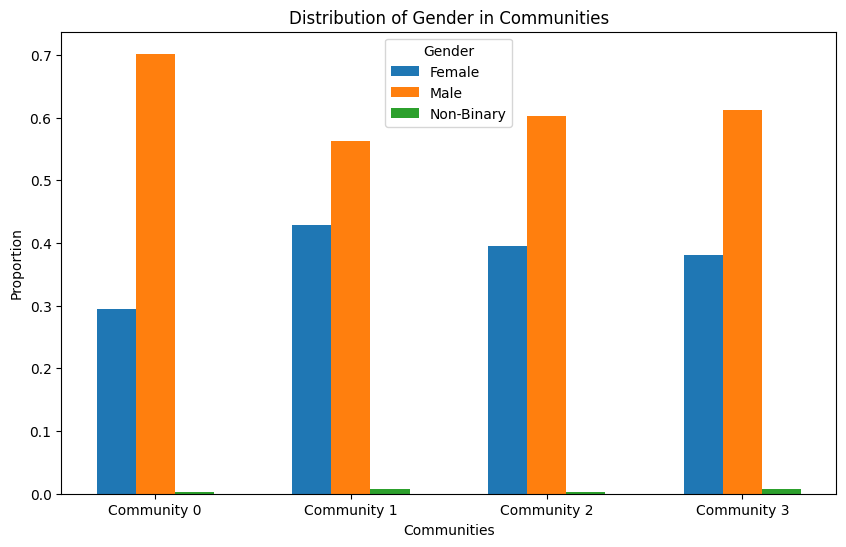

In [103]:
genders = ['Female', 'Male', 'Non-Binary']
values = []
communities = []
for i in range(4): # 4 clusters
    anime_community = users_df[users_df["cluster_id"] == i]
    gender_unique, gender_counts = np.unique(anime_community['gender'].to_list(), return_counts=True)
    gender_counts = np.round(gender_counts/np.sum(gender_counts),3)
    dict_gen = {}
    for j in range(len(gender_unique)):
        dict_gen[gender_unique[j]] = gender_counts[j]
    values.append([dict_gen[k] for k in genders])
    communities.append(f"Community {i}")

values = np.asarray(values)
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = np.arange(len(communities))

for i, gender in enumerate(genders):
    ax.bar(bar_positions + i * bar_width, values[:, i], width=bar_width, label=gender)

ax.set_xticks(bar_positions + bar_width)
ax.set_xticklabels(communities)
ax.set_xlabel('Communities')
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Gender in Communities')
ax.legend(title='Gender')

plt.show()

    

In [104]:
from datetime import datetime
def get_time_period(begin_time):
    #2018 is the year that this dataset is collected
    dob_date = datetime.strptime(begin_time, "%Y-%m-%d %H:%M:%S")
    current_date = datetime.now()
    years = 2018 - dob_date.year - ((current_date.month, current_date.day) < (dob_date.month, dob_date.day))
    return years

Community 0 has 56861 persons
Community 1 has 14134 persons
Community 2 has 10519 persons
Community 3 has 27197 persons


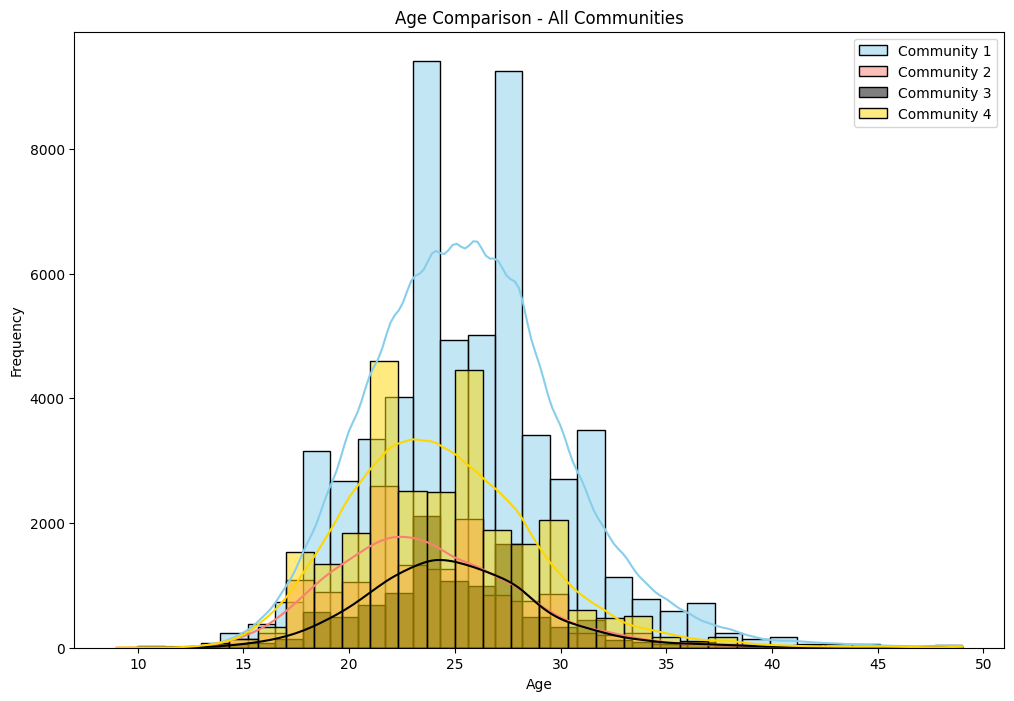

In [105]:
colors = ['skyblue', 'salmon', 'black', 'gold']

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(4):
    age = users_df[users_df["cluster_id"] == i]["birth_date"].to_list()
    age = [get_time_period(birthday) for birthday in age]
    print(f"Community {i} has {len(age)} persons")

    sns.histplot(age, bins=30, kde=True, color=colors[i], label=f'Community {i+1}')

ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age Comparison - All Communities')

ax.legend()

plt.show()


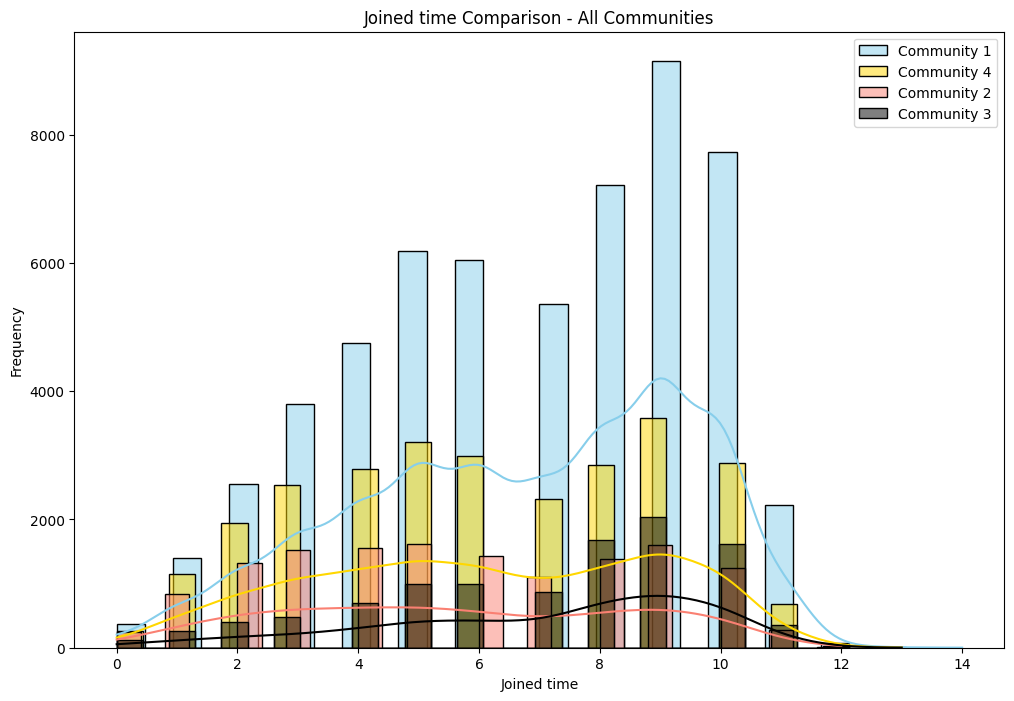

In [106]:
colors = ['skyblue', 'salmon', 'black', 'gold']

fig, ax = plt.subplots(figsize=(12, 8))

for i in [0,3,1,2]:
    join_time = users_df[users_df["cluster_id"] == i]["join_date"].to_list()
    join_time = [get_time_period(join_day) for join_day in join_time]

    sns.histplot(join_time, bins=30, kde=True, color=colors[i], label=f'Community {i+1}', kde_kws={"bw_adjust": 1.6})

ax.set_xlabel('Joined time')
ax.set_ylabel('Frequency')
ax.set_title('Joined time Comparison - All Communities')

ax.legend()

plt.show()


/tmp/ipykernel_14198/1077138793.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories, rotation=90, ha='center')


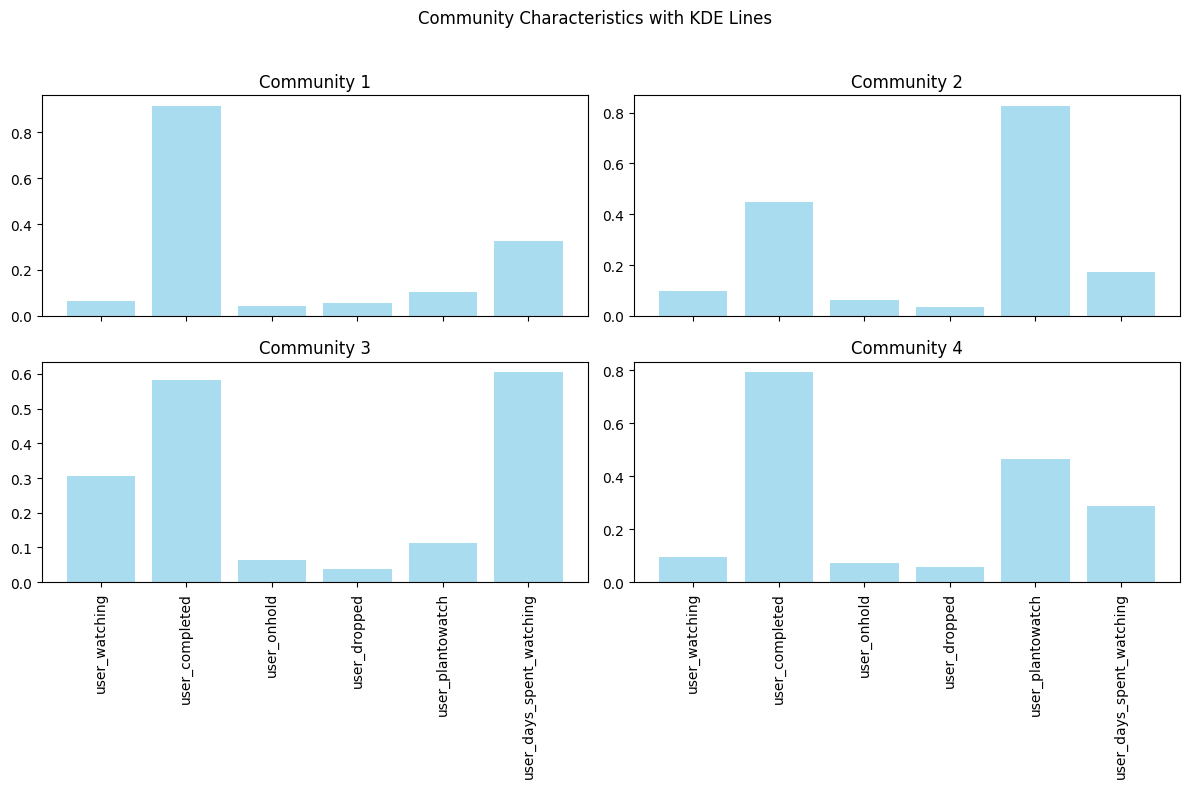

In [107]:
categories = ["user_watching", "user_completed", "user_onhold", "user_dropped", "user_plantowatch", "user_days_spent_watching"]
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

for i, ax in enumerate(axs.flatten()):
    bars = ax.bar(categories, kmeans.cluster_centers_[i], color='skyblue', alpha=0.7)

    ax.set_xticklabels(categories, rotation=90, ha='center')

    ax.set_title(f'Community {i+1}')
fig.suptitle('Community Characteristics with KDE Lines')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()
